In [21]:
import matplotlib.pyplot as plt

In [22]:
class neural_net:
    
    def __init__(self,x,y,struct,activ,epoch,lr=0.01):
        self.layers=len(struct)
        self.struct=struct
        self.activ=activ
        self.x=x
        self.y=y
        self.param=self.evaluate(epoch,lr)

    def gen_network(self):
        param={}
        for i in range(self.layers):
            if i==0:a,b=self.struct[i],self.x.shape[0]
            else:a,b=self.struct[i],self.struct[i-1]
            param[f'w{i+1}']=np.random.randn(a,b)
            param[f'b{i+1}']=np.random.randn(a,1)
        return param

    def activate(self,z,func,d=False,alpha=0.01):
        if func=='s':
            if not d: return 1/(1+np.exp(-z))
            else:     return z*(1-z)
        elif func=='t':
            if not d: return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
            else:     return 1-z**2
        elif func=='r':
            if not d: return np.maximum(0,z)
            else:     return np.int64(z>0)
        elif func=='lr':
            if not d: return np.maximum(0.01*z,z)
            else:     return np.where(z>0,1,alpha)
            
    def forward(self,param):
        fwd={}
        for i in range(self.layers):
            if i==0:
                fwd[f'z{i+1}']=np.dot(param['w1'],self.x)+param[f'b{i+1}']
                fwd[f'a{i+1}']=self.activate(z=(fwd[f'z{i+1}']),func=self.activ[i]) 
            else:
                fwd[f'z{i+1}']=np.dot(param[f'w{i+1}'],fwd[f'a{i}'])+param[f'b{i+1}']
                fwd[f'a{i+1}']=self.activate(z=fwd[f'z{i+1}'],func=self.activ[i]) 
        return fwd

    def back(self,fwd,param):
        delta={}
        for i in range(self.layers,0,-1):
            if i==self.layers:
                delta[f'dz{i}']=fwd[f'a{i}']-self.y
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],fwd[f'a{i-1}'].T)/self.x.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.x.shape[1]
            elif i==1:
                delta[f'dz{i}']=(np.dot(param[f'w{i+1}'].T,delta[f'dz{i+1}']))*(self.activate(fwd[f'z{i}'],self.activ[self.layers-i-1],d=True))
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],self.x.T)/self.x.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.x.shape[1]
            else:
                delta[f'dz{i}']=(np.dot(param[f'w{i+1}'].T,delta[f'dz{i+1}']))*(self.activate(fwd[f'z{i}'],self.activ[self.layers-i-1],d=True))
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],fwd[f'a{i-1}'].T)/self.x.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.x.shape[1]
        return delta

    def update(self,param,delta,lr):
        for i in param:
            param[i]-=lr*delta[f'd{i}']
        return param
    
    def cost(self,yh,n):
        m = self.y.shape[1]
        try:
            logp = np.multiply(self.y,np.log(yh))+np.multiply((1-self.y),np.log(1-yh))
            cost = np.sum(-logp)/m
        except Exception as e:
            print(n,e)
        cost=float(np.squeeze(cost))
        return cost
    
    def evaluate(self,epoch,lr,cost_out=True):  
        param=self.gen_network()
        cost=[]
        for i in range(epoch):
            fwd=self.forward(param=param)
            cost.append(self.cost(fwd[f'a{len(self.struct)}'],i))
            delta=self.back(fwd,param)
            param=self.update(param,delta,lr)
        if cost_out:
            plt.plot(cost)
        return param

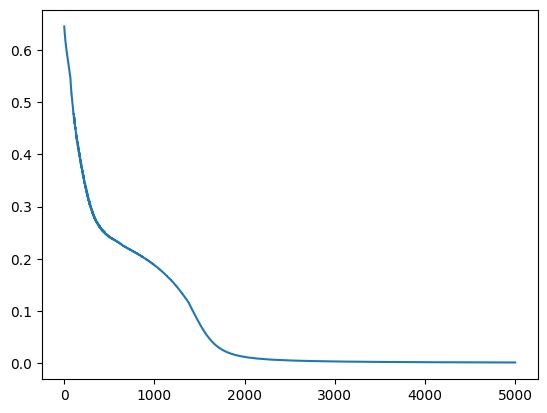

In [29]:
import numpy as np
np.random.seed(1)
x=np.random.randn(4,10)
y=np.int64(np.random.randn(1,10)>0)
nn=neural_net(x,y,[4,3,2,1],['r','r','lr','s'],5000,0.04)

In [11]:
nn.param

{'w1': array([[-1.27957331,  0.06240631, -1.20279115,  0.57922405],
        [-0.4582295 ,  1.3208419 ,  0.22893751,  0.60428534],
        [-0.83833387, -0.90947748,  1.60387061, -0.70635146],
        [-0.2743163 , -0.41550011, -1.08009943,  0.22581317]]),
 'b1': array([[ 0.82904276],
        [-0.95029135],
        [ 0.51633225],
        [-1.32440775]]),
 'w2': array([[-0.50485834, -1.61577235,  1.40574252,  0.40890054],
        [ 0.6262015 , -0.73094247,  1.58075722,  1.96710175],
        [-2.3436297 ,  1.23562091,  1.36356211,  0.3380117 ]]),
 'b2': array([[-1.04747096],
        [ 0.34300288],
        [-0.92331274]]),
 'w3': array([[-0.60392063, -1.23005814,  0.5505375 ],
        [ 1.1215642 , -0.98414587,  1.52813683]]),
 'b3': array([[-1.14434139],
        [ 1.38684254]]),
 'w4': array([[ 0.82676543, -1.50363238]]),
 'b4': array([[1.61579402]])}